# Images Classification with Convolutional Neural Networks & Keras

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import train
from random import shuffle
import imp
import os
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
%matplotlib inline

Using TensorFlow backend.


## Data prep

In [2]:
# Creating dictionary of The Simpsons Characters from dataset with character that have more than 290 pictures
# characters = [k.split('/')[2] for k in glob.glob('./characters/*') if len([p for p in glob.glob(k+'/*') if 'edited' in p or 'pic_vid' in p]) > 290]
# map_characters = dict(enumerate(characters))
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

In [3]:
# Spliting the data to Train and Test
imp.reload(train)
X_train, X_test, y_train, y_test = train.get_dataset(save=True)

Train (14317, 64, 64, 3) (14317, 18)
Test (2527, 64, 64, 3) (2527, 18)
homer_simpson : 1014 train pictures & 162 test pictures
krusty_the_clown : 1010 train pictures & 166 test pictures
lisa_simpson : 1004 train pictures & 172 test pictures
moe_szyslak : 1002 train pictures & 174 test pictures
principal_skinner : 998 train pictures & 178 test pictures
marge_simpson : 996 train pictures & 180 test pictures
charles_montgomery_burns : 990 train pictures & 186 test pictures
bart_simpson : 986 train pictures & 190 test pictures
ned_flanders : 976 train pictures & 200 test pictures
milhouse_van_houten : 920 train pictures & 159 test pictures
chief_wiggum : 839 train pictures & 147 test pictures
abraham_grampa_simpson : 780 train pictures & 133 test pictures
sideshow_bob : 753 train pictures & 124 test pictures
apu_nahasapeemapetilon : 538 train pictures & 85 test pictures
kent_brockman : 416 train pictures & 82 test pictures
comic_book_guy : 402 train pictures & 67 test pictures
edna_krabapp

## Training

In [4]:
## Training in the notebook
# X_train, X_test, y_train, y_test = train.get_dataset()
# model, opt = train.create_model_four_conv(X_train.shape[1:])
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])
# model, history = train.training(model, X_train, X_test, y_train, y_test, data_augmentation=True, callback=True, six_conv=True)

## Loading from callbacks
imp.reload(train)
model = train.load_model_from_checkpoint('./models/weights.best.hdf5', six_conv=True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [5]:
# Test the model
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.95      0.95      0.95       133
  apu_nahasapeemapetilon       0.98      0.98      0.98        85
            bart_simpson       0.95      0.93      0.94       190
charles_montgomery_burns       0.97      0.94      0.95       186
            chief_wiggum       0.97      0.96      0.97       147
          comic_book_guy       0.95      0.88      0.91        67
          edna_krabappel       0.97      0.97      0.97        73
           homer_simpson       0.94      0.92      0.93       162
           kent_brockman       0.99      0.95      0.97        82
        krusty_the_clown       0.99      0.98      0.98       166
            lisa_simpson       0.91      0.94      0.92       172
           marge_simpson       0.98      0.99      0.98       180
     milhouse_van_houten       0.99      0.99      0.99       159
             moe_szyslak       0.93      0.98      0.96       174
        

## Analyzing

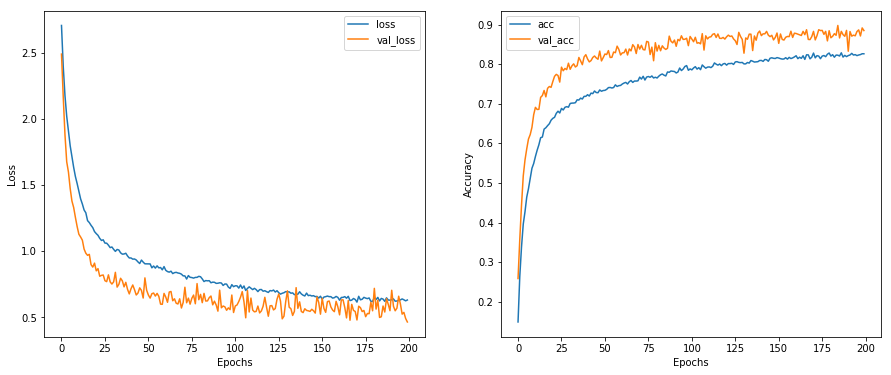

In [282]:
epochs= range(200)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

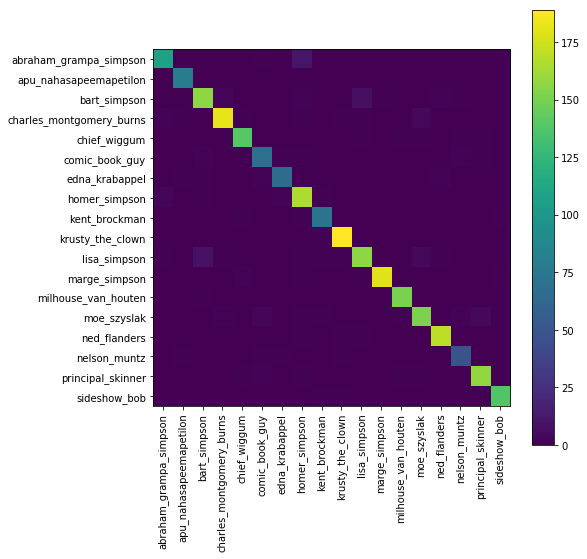

In [17]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

## Predict from file

In [7]:
def file_predict(image_path, all_perc=False):
    image = cv2.imread(image_path)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    pic = cv2.resize(image, (64,64))
    a = model.predict_proba(pic.reshape(1, 64, 64,3))[0]
    if all_perc:
        print('\n'.join(['{} : {}%'.format(map_characters[i], round(k*100)) for i,k in sorted(enumerate(a), key=lambda x:x[1], reverse=True)]))
    else:
        return map_characters[np.argmax(a)].replace('_',' ').title()

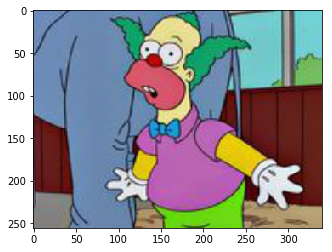

'Krusty The Clown'

In [8]:
image_path = os.path.join(".", "characters","krusty_the_clown","pic_0019.jpg")
file_predict(image_path)

## Predict from URL

In [9]:
import urllib
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

def url_predict(url, all_perc=False):
    image = url_to_image(url)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    pic = cv2.resize(image, (64,64))
    a = model.predict_proba(pic.reshape(1, 64, 64,3))[0]
    if all_perc:
        print('\n'.join(['{} : {}%'.format(map_characters[i], round(k*100)) for i,k in sorted(enumerate(a), key=lambda x:x[1], reverse=True)]))
    else:
        return map_characters[np.argmax(a)].replace('_',' ').title()

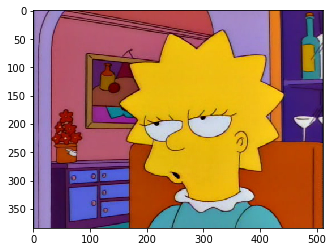

'Lisa Simpson'

In [10]:
url = "https://deadhomersociety.files.wordpress.com/2011/06/amilhousedivided6.png"
url_predict(url)

#### Generating and plotting

In [22]:
print([k for k in glob.glob('./characters/%s/*' % char) if len([p for p in glob.glob(k+'/*')]) > 500])

[]


ValueError: 'a' cannot be empty unless no samples are taken

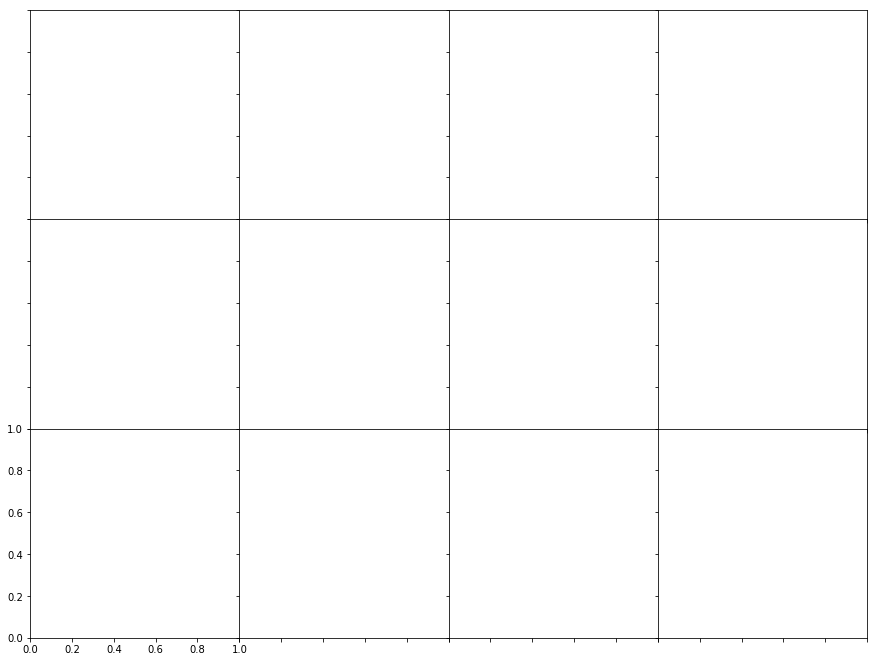

In [13]:
from mpl_toolkits.axes_grid1 import AxesGrid
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'homer_simpson', 
    6: 'krusty_the_clown', 7: 'lisa_simpson', 8: 'marge_simpson', 
    9: 'milhouse_van_houten', 10: 'moe_szyslak', 11: 'ned_flanders', 
    12: 'principal_skinner', 13: 'sideshow_bob'}

F = plt.figure(1, (15,20))
grid = AxesGrid(F, 111,  # similar to subplot(141)
                nrows_ncols=(3, 4),
                axes_pad=0,
                label_mode="1")

for i in range(12):
    char = map_characters[i]
    image = cv2.imread(np.random.choice([k for k in glob.glob('./characters/%s/*' % char) if 'pic_vid' in k]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(image, (64, 64)).astype('float32') / 255.
    a = model.predict(pic.reshape(1, 64, 64,3))[0]
    actual = char.split('_')[0].title()
#     pred = map_characters[np.argmax(a)].split('_')[0].title()
    text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
       key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    img = cv2.resize(img, (352, 352))
    cv2.rectangle(img, (0,260),(215,352),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Actual : %s' % actual, (10, 280), font, 0.7,(0,0,0),2,cv2.LINE_AA)
    for k, t in enumerate(text):
        cv2.putText(img, t,(10, 300+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
#     cv2.putText(img, 'Pred : %s' % pred, (100, 310), font, 0.7,(0,0,0),2,cv2.LINE_AA)    
    grid[i].imshow(img)

#### Finding a threshold

In [287]:
y_pred = model.predict(X_test, verbose=0)
comp = np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1)
index_good, index_false = [i for i, x in enumerate(comp) if x], [i for i, x in enumerate(comp) if not x]

In [290]:
max_good = np.max(y_pred[index_good], axis=1)
max_wrong = np.max(y_pred[index_false], axis=1)
diff_good = np.diff(np.sort(y_pred[index_good], axis=1)[:, 16:])
diff_wrong = np.diff(np.sort(y_pred[index_false], axis=1)[:, 16:])
std_good = np.std(y_pred[index_good], axis=1)
std_wrong = np.std(y_pred[index_false], axis=1)

print("For good predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_good),
                                                                            np.mean(diff_good),
                                                                            np.mean(std_good)))
print("For wrong predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_wrong),
                                                                             np.mean(diff_wrong),
                                                                            np.mean(std_wrong)))

For good predictions : Max : 0.84, Difference Two First : 0.786, STD : 0.19
For wrong predictions : Max : 0.37, Difference Two First : 0.200, STD : 0.09


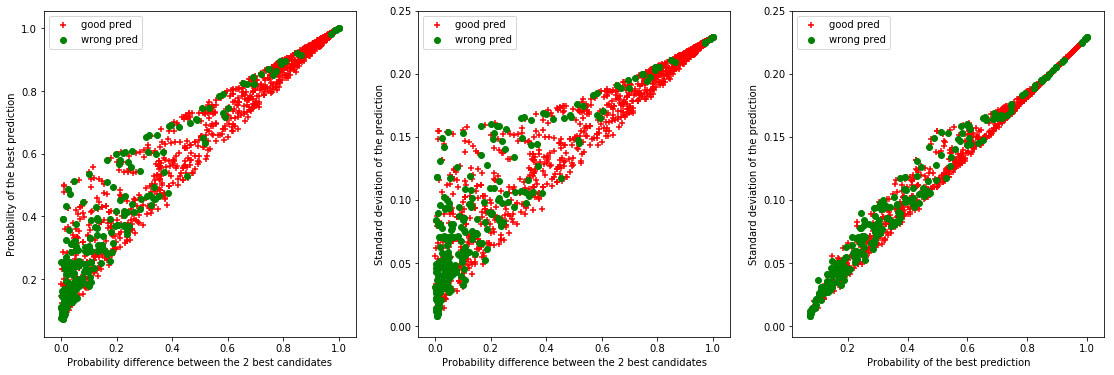

In [291]:
f, ax = plt.subplots(ncols=3, figsize=(19,6))
ax[0].scatter(x = diff_good, y= max_good, c='red', marker='+', label = 'good pred')
ax[0].scatter(x = diff_wrong, y= max_wrong, c='green', marker='o', label = 'wrong pred')
ax[0].legend()
ax[0].set_xlabel('Probability difference between the 2 best candidates')
ax[0].set_ylabel('Probability of the best prediction')

ax[1].scatter(x = diff_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[1].scatter(x = diff_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[1].legend()
ax[1].set_xlabel('Probability difference between the 2 best candidates')
ax[1].set_ylabel('Standard deviation of the prediction')

ax[2].scatter(x = max_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[2].scatter(x = max_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[2].legend()
ax[2].set_xlabel('Probability of the best prediction')
ax[2].set_ylabel('Standard deviation of the prediction')

In [284]:
## FOR LISA
id_lisa = 10
index_lisa = [i for i, x in enumerate(np.argmax(y_pred, axis= 1) == id_lisa) if x]
index_good_lisa, index_wrong_lisa = [k for k in index_lisa if k in index_good], [k for k in index_lisa if k in index_false]

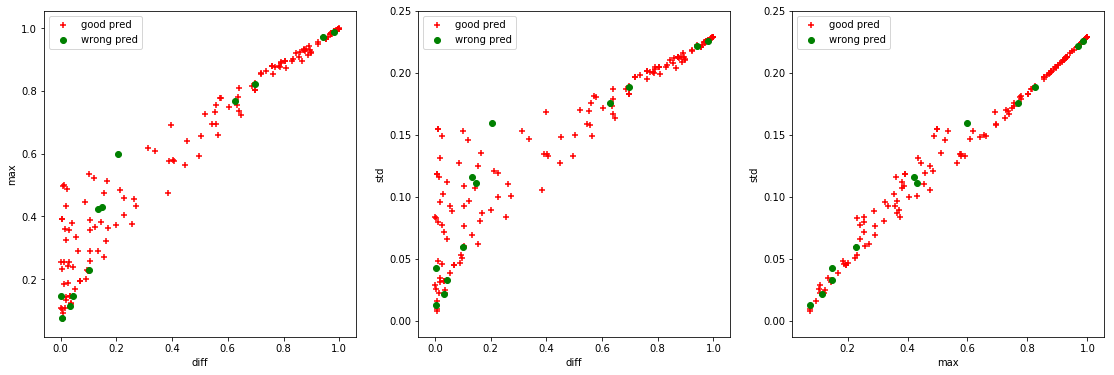

In [286]:
dicts = {'max':{'good':np.max(y_pred[index_good_lisa], axis=1), 
                'wrong': np.max(y_pred[index_wrong_lisa], axis=1)},
        'diff':{'good':np.diff(np.sort(y_pred[index_good_lisa], axis=1)[:, 16:]), 
                'wrong': np.diff(np.sort(y_pred[index_wrong_lisa], axis=1)[:, 16:])}, 
        'std':{'good': np.std(y_pred[index_good_lisa], axis=1), 
                'wrong': np.std(y_pred[index_wrong_lisa], axis=1)}}

import itertools
chosen = list(itertools.combinations(dicts.items(),2))
f, ax = plt.subplots(ncols=3, figsize=(19,6))
for i in range(3):
    ax[i].scatter(x = chosen[i][0][1]['good'], y= chosen[i][1][1]['good'], 
                  c='red', marker='+', label = 'good pred')
    ax[i].scatter(x = chosen[i][0][1]['wrong'], y= chosen[i][1][1]['wrong'], 
                  c='green', marker='o', label = 'wrong pred')
    ax[i].legend()
    ax[i].set_xlabel(chosen[i][0][0])
    ax[i].set_ylabel(chosen[i][1][0])